In [3]:
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib
from matplotlib import pyplot as plt

In [46]:
df=pd.read_csv('Data/SV Clustering Data.csv', sep=',')
#df=df.drop('Respondent Number',1)

In [47]:
df['Gender'].dtype

dtype('int64')

In [16]:
#pd.get_dummies(df['Marital Status'], prefix='Marital Status').head()

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Marital Status'], prefix='Marital Status')], axis=1)
df = df.drop(['Marital Status'], axis=1)
#df=df.drop(['ID'], axis=1)
df.head(n=3)

In [40]:
df=df.reindex(np.random.permutation(df.index))
df=df.reset_index()
df=df.drop(["index"],axis=1)
df.head()

,ID,Gender,Income Bin,Marital Status,Age,Children Under 6,Children 6 To 12,Children 13 To 17,People 18 or Older,Driving Area,...,Storage,Amenities,E/T,Other,Safety,Value,Gas,Image,Dealer,Ads
0,73659,0,1,1,38,0,0,0,1,3,...,1.0,1.000,1.00,1.000000,1.00,1.000,1.000000,1.000000,1.00,1.000000
1,5461,0,8,1,43,0,0,0,1,3,...,3.4,2.750,4.75,3.000000,4.25,2.875,4.333333,2.666667,3.75,2.666667
2,67118,0,19,3,54,0,0,2,2,2,...,3.8,3.250,3.00,1.666667,3.50,3.500,4.000000,2.000000,1.25,1.000000
3,76997,0,9,3,67,0,0,0,2,3,...,3.6,4.000,4.00,4.000000,4.00,3.625,4.000000,4.000000,3.50,2.666667
4,58986,1,16,3,68,1,1,0,6,1,...,3.0,3.125,3.25,3.000000,4.00,3.000,2.333333,4.000000,1.50,1.666667


In [41]:
X=df.values[:,1:]
best_n=8
best_clusterer=KMeans(n_clusters=best_n)
cluster_labels=best_clusterer.fit_predict(X)
clusterCenters=best_clusterer.cluster_centers_

In [42]:
clusterFrame=pd.DataFrame(cluster_labels)
centersFrame=pd.DataFrame(clusterCenters)
outData=pd.concat([clusterFrame, df],axis=1)

In [43]:
outData.head(n=3)

,0,ID,Gender,Income Bin,Marital Status,Age,Children Under 6,Children 6 To 12,Children 13 To 17,People 18 or Older,...,Storage,Amenities,E/T,Other,Safety,Value,Gas,Image,Dealer,Ads
0,7,73659,0,1,1,38,0,0,0,1,...,1.0,1.00,1.00,1.000000,1.00,1.000,1.000000,1.000000,1.00,1.000000
1,7,5461,0,8,1,43,0,0,0,1,...,3.4,2.75,4.75,3.000000,4.25,2.875,4.333333,2.666667,3.75,2.666667
2,0,67118,0,19,3,54,0,0,2,2,...,3.8,3.25,3.00,1.666667,3.50,3.500,4.000000,2.000000,1.25,1.000000


In [44]:
outData.to_csv("results/SV ClusterLabels.csv", sep=',')
centersFrame.to_csv("results/SV ClusterCenters.csv", sep=',')

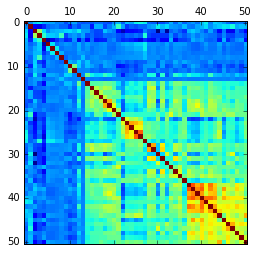

In [45]:
plt.matshow(df.corr())

In [ ]:
X=df.sample(n=1000).values[:,2:]
tsnemodel = TSNE(n_components=2)
tsnedata=tsnemodel.fit_transform(X[1:])

In [ ]:
plt.scatter(tsnedata[:,0],tsnedata[:,1])

In [ ]:
print()